---
# Übungszettel 8, Python Aufgabe
---

**ausgegeben am Mi 10.6.2020 12 Uhr, abzugeben bis Mi 17.6.2020 12 Uhr**

Bearbeitet von: Justus Multhaup

Zusammenarbeit mit: anderer Name oder leer

Übungsgruppe: Laura Strampe

---

**Einführung**: In den Experimenten zur Vorlesung haben Sie eine wichtige elektrische Schaltung kennen gelernt: den einfachen Bandpassfilter. Diese Verkettung von Kapazitäten, Widerständen und Spulen dämpft ein Eingangsignal stark, außer wenn es in der Nähe einer schmalen Resonanz des Filters liegt. Das Gegenteil des Bandpassfilters ist der Bandstoppfilter (auch Bandsperre oder Badewannenfilter genannt). Dieser dämpft die Übertragung eines schmalen Frequenzbandes. Der Schaltkreis sieht so aus:

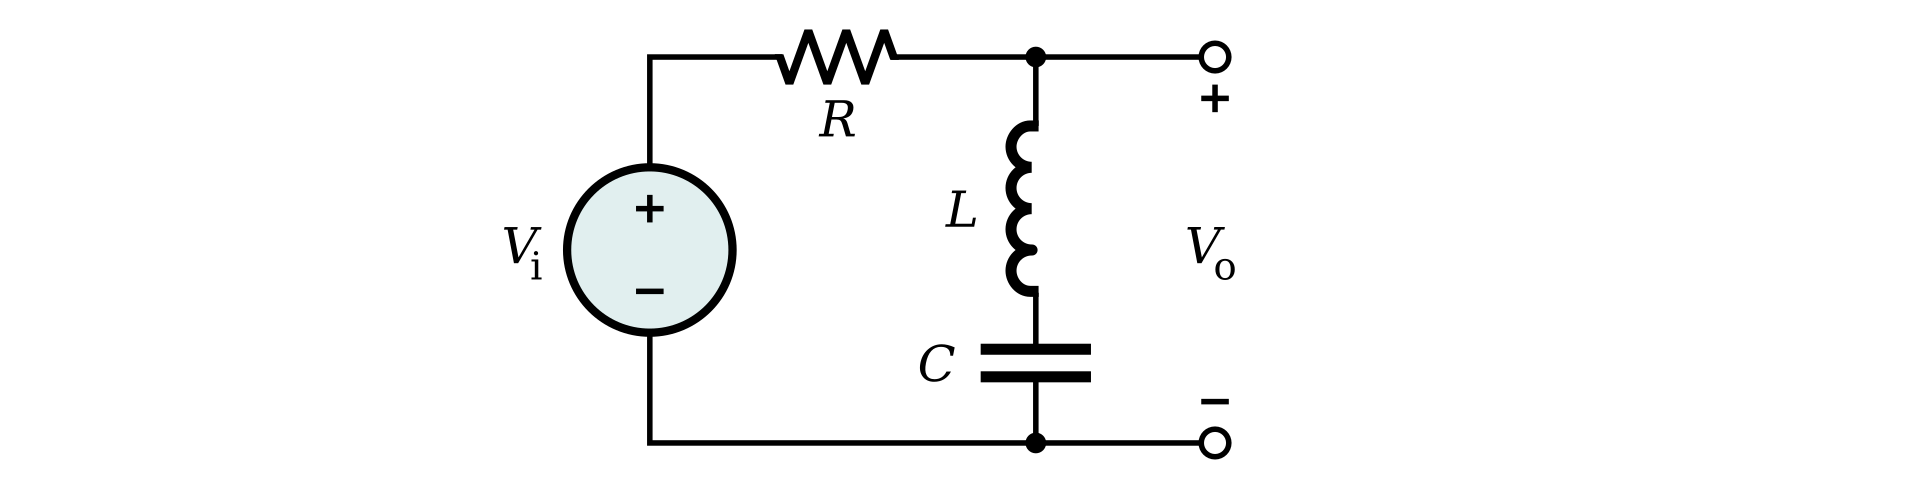

Solche Filter werden z.B. eingesetzt um das 50 Hz Rauschen der Netzspannung von Messungen oder Tonaufnahmen zu entfernen.

Im allgemeinen löst man etwas kompliziertere Schaltkreise fast immer numerisch um lange Rechnungen zu vermeiden. Auch wenn die Übertragungsfunktion des einfachen Bandstoppfilters vollständig analytisch bestimmt werden kann, wollen wir hier die Gelegenheit nutzen anhand von diesem Schaltungssimulationen kennen zu lernen.

**Aufgabe**: Die Differentialgleichungen für die Spannungen sind:

$$\frac{\textrm{d}V_{R}}{\textrm{d}t}=R\cdot\frac{\textrm{d}I_{R}}{\textrm{d}t}=R\cdot\frac{V_{L}}{L}$$

$$\frac{\textrm{d}V_{C}}{\textrm{d}t}=\frac{I_{C}}{C}=\frac{V_{R}}{R\cdot C}$$

$$\frac{\textrm{d}V_{L}}{\textrm{d}t}=dV_{i}/dt-\frac{\textrm{d}V_{R}}{\textrm{d}t}-\frac{\textrm{d}V_{C}}{\textrm{d}t}=dV_{i}/dt-R\cdot\frac{V_{L}}{L}-\frac{V_{R}}{R\cdot C}$$

1. Überzeugen Sie sich von der Richtigkeit der Differentialgleichungen.

2. Schreiben Sie eine Funktion, welche die zeitlichen Ableitungen der Spannungen `V=[V_R,V_C,V_L]` gemäß der Differentialgleichungen mit einer Eingangsspannung `Vi = np.sin(2*pi*t*freq)` berechnet.

3. Schreiben Sie eine Funktion `A(R,C,L,freq)`, welche das Verhältnis der Ausgangssignal-Amplitude zum Eingangssignal berechnet. Integrieren Sie dazu die Differentialgleichungen über 20 Perioden und nutzen Sie die letzten 10 Perioden für die Berechnung. Wählen Sie als Startwerte 0 V für alle Spannungen.

4. Plotten Sie das Amplitudenverhältnis für verschiedene Eingangsfrequenzen in einem Bereich um 50 Hz für $R = 10$ Ohm, $C = 0.1\times10^{-3}$ F und $L = 0.1$ H.

5. Plotten Sie die Spannungen an den verschiedenen Komponenten für eine Freqenz unterhalb, oberhalb und genau auf 50 Hz für die ersten 10 Perioden. Beschreiben Sie qualitativ warum das Ausgangssignal entweder gedämpft oder nicht gedämpft wird.

**Vorgehensweise**: Wir empfehlen folgendes Vorgehen, dem Sie jedoch nicht folgen müssen:

1. Überzeugen Sie sich von der Richtigkeit der Differentialgleichungen indem Sie die Kirchhoff'schen Regeln für den Schwingkreis überprüfen.

2. Schreiben Sie eine Funktion `f(t,V,R,C,L,freq)`, welche die zeitlichen Ableitungen der Spannungen `V=[V_R,V_C,V_L]` gemäß der Differentialgleichungen mit einer Eingangsspannung `Vi = np.sin(2*pi*t*freq)` berechnet.

3. Schreiben Sie eine Funktion `A(R,C,L,freq)`, welche das Verhältnis der Ausgangssignal-Amplitude zum Eingangssignal berechnet. Integrieren Sie dazu die Differentialgleichungen über 20 Perioden und nutzen Sie die letzten 10 Perioden für die Berechnung mit `t_eval`. Wählen Sie als Startwerte 0 V für alle Spannungen. Verwenden Sie das Verhältnis der Standardabweichungen `numpy.std()` vom Eingangssignal und dem Ausgangsignal für die Berechnung.

4. Plotten Sie das Amplitudenverhältnis für verschiedene Eingangsfrequenzen in einem Bereich um 50 Hz für $R = 10$ Ohm, $C = 0.1\times10^{-3}$ F und $L = 0.1$ H. Nutzen Sie eine logaritmische $x-$ Achse (Frequenzachse). Für die Auswahl der Fequenzen nutzen Sie beispielsweise `numpy.geomspace()`. Die verwendung ist analog zu `numpy.linspace()`.

5. Plotten Sie die Spannungen an den verschiedenen Komponenten für eine Freqenz unterhalb, oberhalb und genau auf 50 Hz für die ersten 10 Perioden. Beschreiben Sie qualitativ warum das Ausgangssignal entweder gedämpft oder nicht gedämpft wird.

**Hilfestellung**: `scipy.integrate.solve_ivp()` kann zusätzliche Argumente an die zu integrierende Funktion übergeben. Soll z.B. eine Funktion `f(t,x,a,b)` integriert werden, können die Argumente `a,b` übergeben werden mit `solve_ivp(f, ... args=(a,b))`.

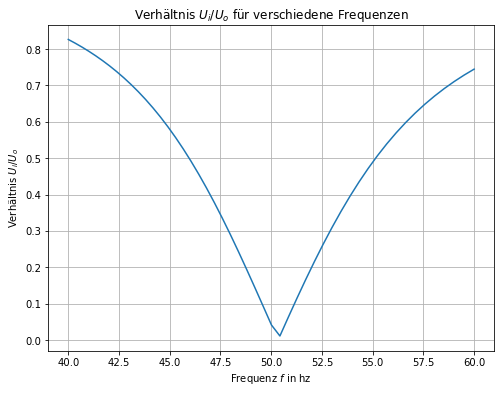

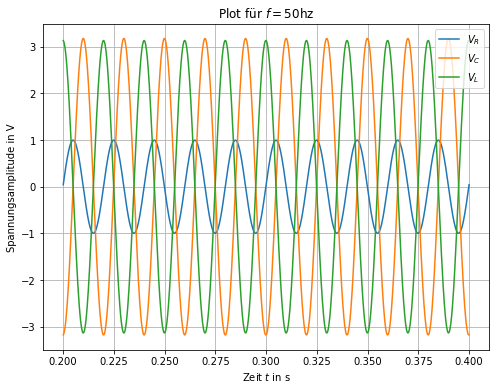

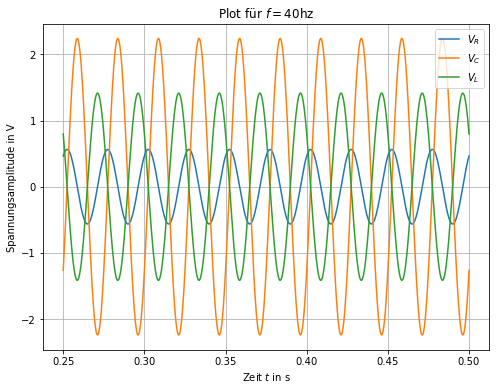

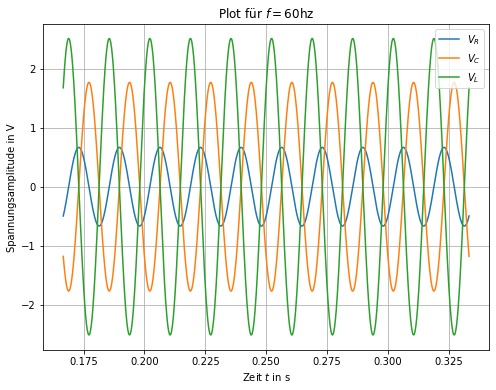

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import electron_mass as e_m,elementary_charge as e_c
from scipy.integrate import solve_ivp

R = 10
C = 0.1e-3
L = 0.1

def f(t,V,R,C,L,freq):
    Vi = np.sin(2*np.pi*t*freq)
    dVidt = np.cos(2*np.pi*t*freq)*2*np.pi*freq
    return [R*V[2]/L,V[0]/(R*C),dVidt-R*V[2]/L-V[0]/(R*C)]

def A(R,C,L,freq):
    x0 = np.array([0,0,0])
    T = 1/freq
    t_end = 20*T
    sol = solve_ivp(f,[0,t_end],x0,t_eval = np.linspace(10*T,t_end,1000),args=(R,C,L,freq))
    Vo = sol.y[1]+sol.y[2]
    Vi = np.sin(2*np.pi*sol.t*freq)
    stdVo = np.std(Vo)
    stdVi = np.std(Vi)
    return stdVo/stdVi, sol




##frequenzbereich
w = np.geomspace(40,60,50)
a = np.array([])


for i in range(len(w)):
    a = np.append(a,A(R,C,L,w[i])[0])

plt.figure(figsize=(8,6))
plt.title("Verhältnis $U_i/U_o$ für verschiedene Frequenzen")
plt.xlabel("Frequenz $f$ in hz")
plt.ylabel("Verhältnis $U_i/U_o$")
plt.grid()
plt.plot(w,a)
plt.show()

plt.figure(figsize=(8,6))
plt.title("Plot für $f=50$hz")
plt.grid()
plt.xlabel("Zeit $t$ in s")
plt.ylabel("Spannungsamplitude in V")
plt.plot(A(R,C,L,50)[1].t,A(R,C,L,50)[1].y[0],label = "$V_R$")
plt.plot(A(R,C,L,50)[1].t,A(R,C,L,50)[1].y[1],label = "$V_C$")
plt.plot(A(R,C,L,50)[1].t,A(R,C,L,50)[1].y[2],label = "$V_L$")
plt.legend(loc = "upper right")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Plot für $f=40$hz")
plt.grid()
plt.xlabel("Zeit $t$ in s")
plt.ylabel("Spannungsamplitude in V")
plt.plot(A(R,C,L,40)[1].t,A(R,C,L,40)[1].y[0],label = "$V_R$")
plt.plot(A(R,C,L,40)[1].t,A(R,C,L,40)[1].y[1],label = "$V_C$")
plt.plot(A(R,C,L,40)[1].t,A(R,C,L,40)[1].y[2],label = "$V_L$")
plt.legend(loc = "upper right")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Plot für $f=60$hz")
plt.grid()
plt.xlabel("Zeit $t$ in s")
plt.ylabel("Spannungsamplitude in V")
plt.plot(A(R,C,L,60)[1].t,A(R,C,L,60)[1].y[0],label = "$V_R$")
plt.plot(A(R,C,L,60)[1].t,A(R,C,L,60)[1].y[1],label = "$V_C$")
plt.plot(A(R,C,L,60)[1].t,A(R,C,L,60)[1].y[2],label = "$V_L$")
plt.legend(loc = "upper right")
plt.show()



In [4]:
"""Die Spannungen Vc und VL sind immer gegenphasig. Die Intensität der Dämpfung hängt also nur von der Differenz der maximalen Auslenkungen ab. Bei 50hz sind die Auslenkungen fast gleich groß, sodass sich Vc und VL beinahe auslöschen. Bei Frequenzen darüber bzw darunter dominiert jeweils eine der beiden Spannungen, sodass eine Gesamtspannung ungleich null resultiert."""

'Die Spannungen Vc und VL sind immer gegenphasig. Die Intensität der Dämpfung hängt also nur von der Differenz der maximalen Auslenkungen ab. Bei 50hz sind die Auslenkungen fast gleich groß, sodass sich Vc und VL beinahe auslöschen. Bei Frequenzen darüber bzw darunter dominiert jeweils eine der beiden Spannungen, sodass eine Gesamtspannung ungleich null resultiert.'